# Dynamic time wrapping

Firstly, we need to scrape a search trend from the internet. For example, we will get search information for a query "rijeka". This query is only for example purposes.

In [73]:
import pandas as pd
import numpy as np

search_stats = pd.read_csv("multiTimeline.csv")
search_stats["week"] = pd.to_datetime(search_stats["week"])
search_stats = search_stats.loc[np.repeat(search_stats.index, 7)].reset_index(drop=True)

date_range = pd.date_range("2007-12-27", "2009-12-30")
search_stats["week"] = date_range

search_stats

,week,popularity
0,2007-12-27,48
1,2007-12-28,48
2,2007-12-29,48
3,2007-12-30,48
4,2007-12-31,48
...,...,...
730,2009-12-26,67
731,2009-12-27,67
732,2009-12-28,67
733,2009-12-29,67


Let's plot what was the popularity of our query.

<Axes: xlabel='week'>

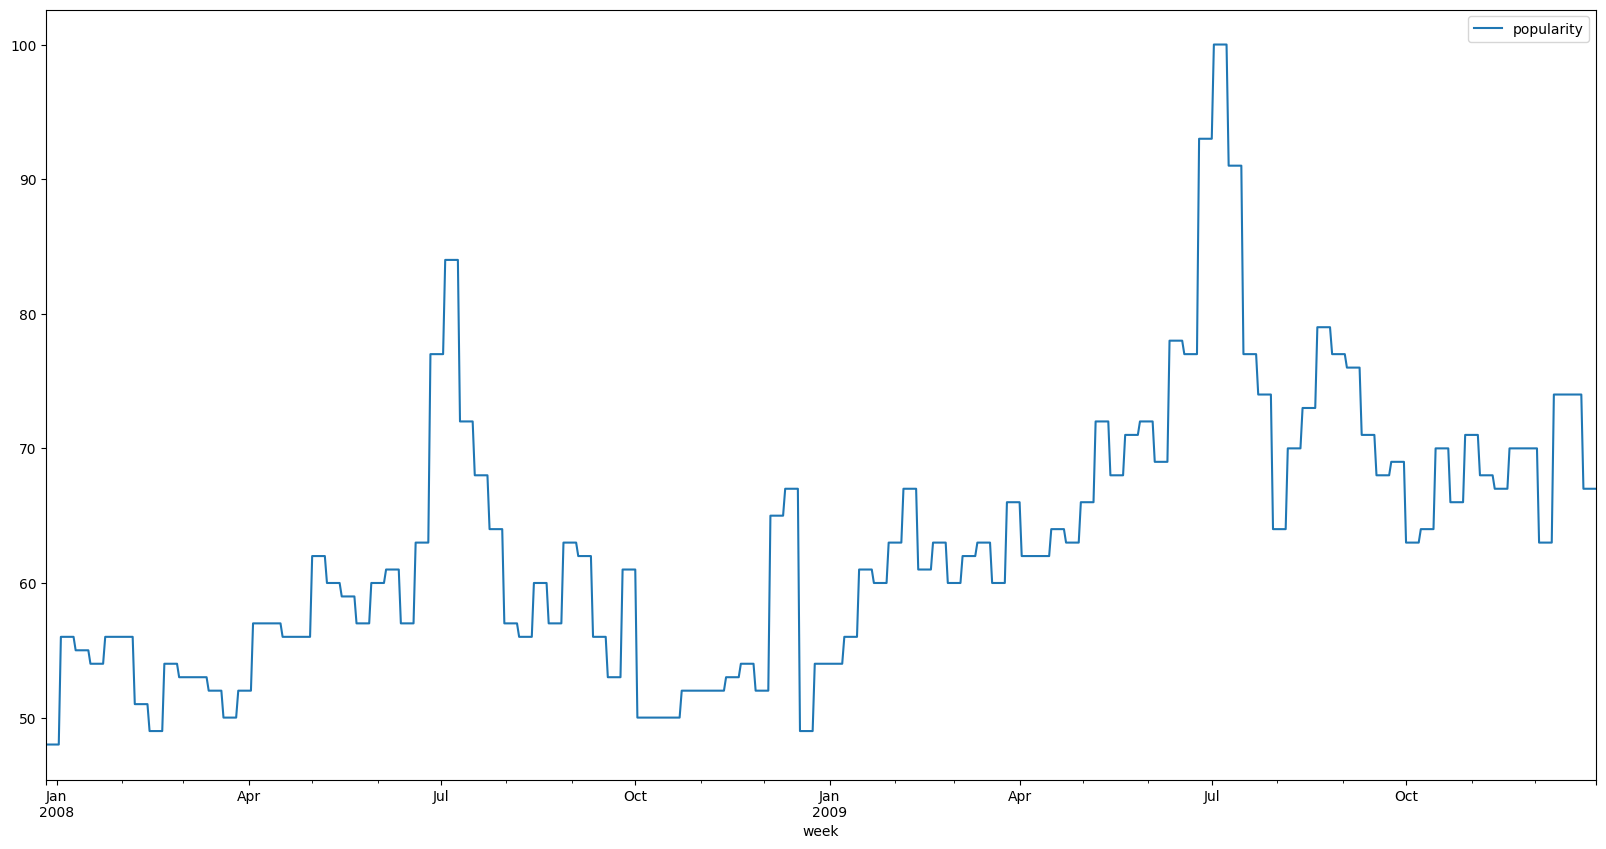

In [74]:
search_stats.plot(x="week", y="popularity", figsize=(20, 10))

As we can see, we have some popularity spikes for our query. Our task is to check if these spikes are connected to reservation dates, and how are they connected. Let's extract reservation dates from the original dataset and plot how many reservations are booked on a certain date.

In [75]:
dataset = pd.read_parquet("../../lumen_dataset/train.parquet")[["reservation_date"]]
dataset["reservation_date"] = pd.to_datetime(dataset["reservation_date"])
dataset = dataset[dataset["reservation_date"].dt.year != 2007]

dataset = dataset.groupby(dataset.columns.to_list(), as_index=False).size()

dataset

,reservation_date,size
0,2008-01-01,21
1,2008-01-02,2
2,2008-01-03,43
3,2008-01-04,67
4,2008-01-05,77
...,...,...
722,2009-12-27,3
723,2009-12-28,5
724,2009-12-29,13
725,2009-12-30,7


<Axes: xlabel='reservation_date'>

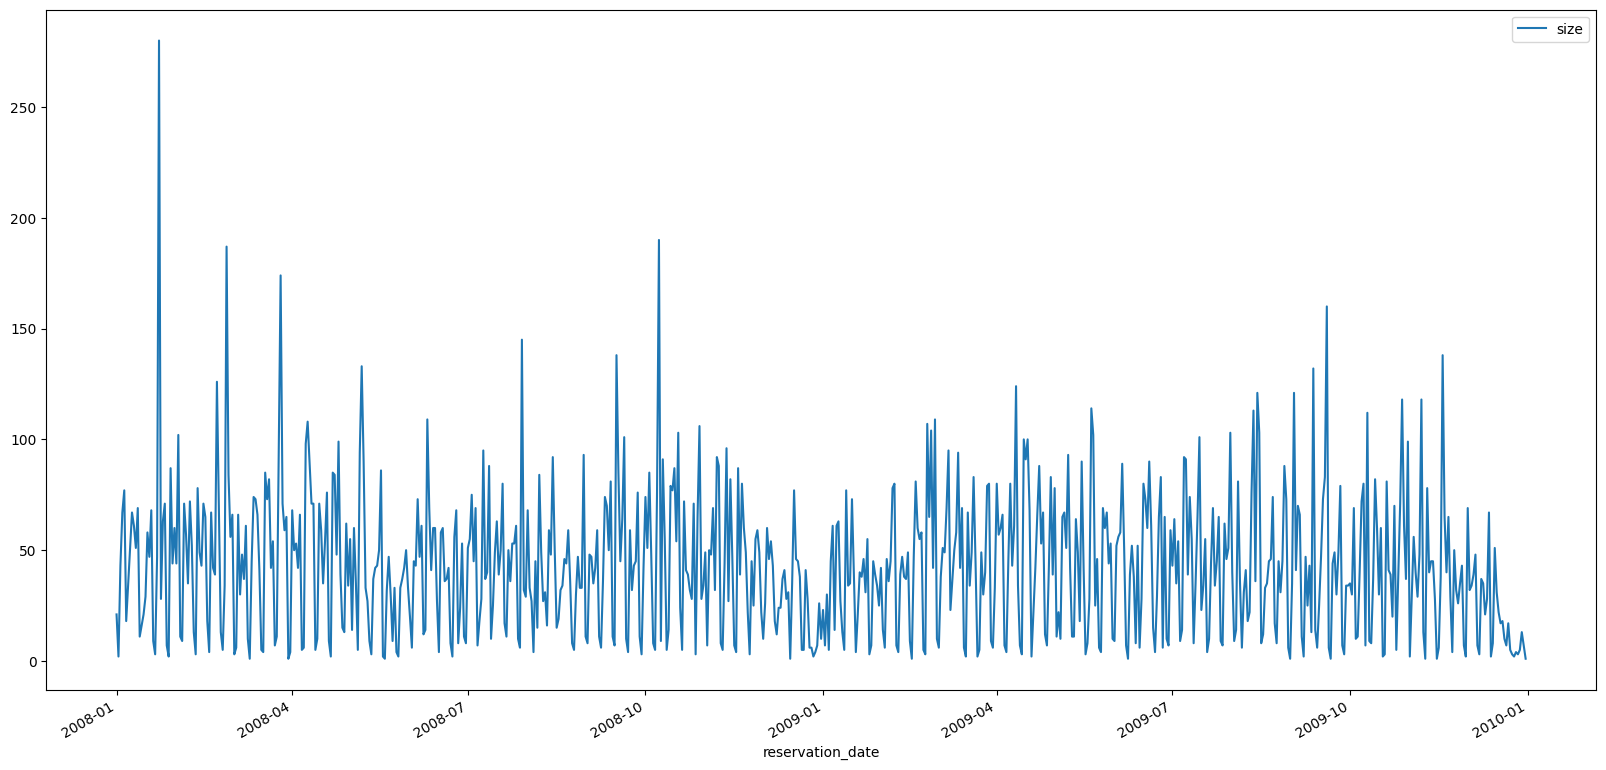

In [76]:
dataset.plot(x="reservation_date", y="size", figsize=(20, 10))

<Axes: xlabel='Index', ylabel='Query value'>

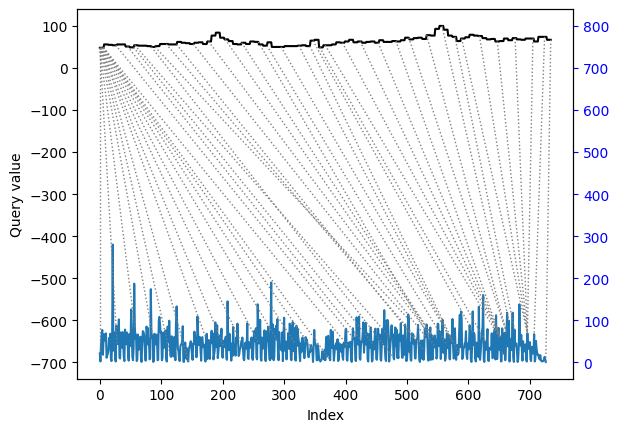

In [79]:
from dtw import *

dtw(search_stats["popularity"], dataset["size"], keep_internals=True).plot(
    type="twoway", offset=-700
)